<a href="https://colab.research.google.com/github/bhanvimenghani/cats-dogs/blob/master/Copy_of_1)_Dog_Vs_Cat_Classifier_Using_Mxnet_Gluon_Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents


## [0. Install](#0)


## [1. Importing mxnet-gluoncv backend](#1)


## [2. Creating and Managing experiments](#1)


## [3. Training a Cat Vs Dog image classifier](#2)


## [4. Validating the trained classifier](#3)


## [5. Running inference on test images](#4)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
 
     - (Select the requirements file as per OS and CUDA version)

In [0]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (345/345), done.
remote: Compressing objects: 100% (285/285), done.
remote: Total 3697 (delta 160), reused 168 (delta 55), pack-reused 3352
Receiving objects: 100% (3697/3697), 115.42 MiB | 14.02 MiB/s, done.
Resolving deltas: 100% (2154/2154), done.
Checking out files: 100% (1456/1456), done.


In [0]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

     |████████████████████████████████| 710.5MB 22kB/s 
     |████████████████████████████████| 696kB 56.5MB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=880ae976efe67f37138f83e03f81c1f45c31ed250760a6ea81e1e4096c6405e6
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built GPUtil
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


<a id='1'></a>
# Imports

In [0]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [0]:
#Using mxnet-gluon backend 
from gluon_prototype import prototype

<a id='2'></a>
# Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [0]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1");

Mxnet Version: 1.6.0

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /content/workspace/sample-project-1/sample-experiment-1/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------sample-project-1 (Project name can be different)
                        |
                        |
                        |-----sample-experiment-1 (Experiment name can be different)
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)
                                    

<a id='2'></a>
# Training a Cat Vs Dog image classifier

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - num_epochs
        
        
## Dataset folder structure

    parent_directory
        |
        |
        |------cats
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)
        |------dogs
                |
                |------img1.jpg
                |------img2.jpg
                |------.... (and so on)     

In [0]:
gtf.Default(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train", 
            model_name="resnet18_v1", 
            num_epochs=5);

#Read the summary generated once you run this cell. 

Dataset Details
    Train path:     monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_train
    Val path:       None
    CSV train path: None
    CSV val path:   None

Dataset Params
    Input Size:   224
    Batch Size:   4
    Data Shuffle: True
    Processors:   2
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 140
    Num val images:   60
    Num classes:      2

Model Params
    Model name:           resnet18_v1
    Use Gpu:              False
    Use pretrained:       True
    Freeze base network:  True

Model Details
    Loading pretrained model


monk_v1/monk/system/imports.py:160: UserWarning: GPU not accessible yet requested.
  warnings.warn(msg)
42435KB [00:02, 19095.57KB/s]                           


    Model Loaded on device
        Model name:                           resnet18_v1
        Num of potentially trainable layers:  41
        Num of actual trainable layers:       1

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   steplr
    Params: {'step_size': 1, 'gamma': 0.98, 'last_epoch': -1}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: clipnorm and clipvalue are active only for keras in current version of Monk
  warnings.warn(msg)
monk_v1/monk/system/imports.py:160: UserWarning: ArgumentWarning: momentum_dampening_rate is active only for pytorch in current version of Monk
  warnings.warn(msg)


In [0]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

  0%|          | 0/35 [00:00<?, ?it/s]

Training Start
    Epoch 1/5
    ----------


100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  3%|▎         | 1/35 [00:00<00:03,  9.35it/s]



    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.621, Train-loss: 0.862 | Val-acc: 0.866667, Val-loss: 0.403, | time: 25.6 sec

    Epoch 2/5
    ----------




  6%|▌         | 2/35 [00:00<00:07,  4.27it/s]

  9%|▊         | 3/35 [00:01<00:10,  3.17it/s]

 11%|█▏        | 4/35 [00:01<00:11,  2.69it/s]

 14%|█▍        | 5/35 [00:02<00:12,  2.43it/s]

 17%|█▋        | 6/35 [00:02<00:12,  2.29it/s]

 20%|██        | 7/35 [00:03<00:13,  2.15it/s]

 23%|██▎       | 8/35 [00:03<00:12,  2.08it/s]

 26%|██▌       | 9/35 [00:04<00:12,  2.04it/s]

 29%|██▊       | 10/35 [00:04<00:12,  2.03it/s]

 31%|███▏      | 11/35 [00:05<00:11,  2.00it/s]

 34%|███▍      | 12/35 [00:05<00:11,  1.99it/s]

 37%|███▋      | 13/35 [00:06<00:11,  1.98it/s]

 40%|████      | 14/35 [00:06<00:10,  1.98it/s]

 43%|████▎     | 15/35 [00:07<00:10,  1.98it/s]

 46%|████▌     | 16/35 [00:07<00:09,  1.99it/s]

 49%|████▊     | 17/35 [00:08<00:09,  1.98it/s]

 51%|█████▏    | 18/35 [00:08<00:08,  1.99it/s]

 54%|█████▍    | 19/35 [00:09<00:08,  1.99it/s]

 57%|█████▋    | 20/35 [00:09<00:07,  1.99it/s]

 60%|██████    | 21/35 [00:10<00:07,  1.98it/s]

 63%|██████▎   | 22/35 [00



    curr_lr - 0.0098
    [Epoch 2] Train-acc: 0.757, Train-loss: 0.508 | Val-acc: 0.816667, Val-loss: 0.392, | time: 25.6 sec

    Epoch 3/5
    ----------






  6%|▌         | 2/35 [00:00<00:09,  3.40it/s]



  9%|▊         | 3/35 [00:01<00:11,  2.80it/s]



 11%|█▏        | 4/35 [00:01<00:12,  2.51it/s]



 14%|█▍        | 5/35 [00:02<00:12,  2.34it/s]



 17%|█▋        | 6/35 [00:02<00:12,  2.23it/s]



 20%|██        | 7/35 [00:03<00:13,  2.13it/s]



 23%|██▎       | 8/35 [00:03<00:12,  2.08it/s]



 26%|██▌       | 9/35 [00:04<00:12,  2.06it/s]



 29%|██▊       | 10/35 [00:04<00:12,  2.05it/s]



 31%|███▏      | 11/35 [00:05<00:11,  2.04it/s]



 34%|███▍      | 12/35 [00:05<00:11,  2.03it/s]



 37%|███▋      | 13/35 [00:06<00:10,  2.00it/s]



 40%|████      | 14/35 [00:06<00:10,  2.00it/s]



 43%|████▎     | 15/35 [00:07<00:09,  2.00it/s]



 46%|████▌     | 16/35 [00:07<00:09,  2.01it/s]



 49%|████▊     | 17/35 [00:08<00:08,  2.01it/s]



 51%|█████▏    | 18/35 [00:08<00:08,  2.01it/s]



 54%|█████▍    | 19/35 [00:09<00:08,  2.00it/s]



 57%|█████▋    | 20/35 [00:09<00:07,  1.99it/s]



 60%|██████    | 21/35 [00:10<00:07



    curr_lr - 0.009604
    [Epoch 3] Train-acc: 0.814, Train-loss: 0.475 | Val-acc: 0.866667, Val-loss: 0.379, | time: 25.8 sec

    Epoch 4/5
    ----------








  6%|▌         | 2/35 [00:00<00:10,  3.19it/s]





  9%|▊         | 3/35 [00:01<00:11,  2.69it/s]





 11%|█▏        | 4/35 [00:01<00:12,  2.42it/s]





 14%|█▍        | 5/35 [00:02<00:13,  2.29it/s]





 17%|█▋        | 6/35 [00:02<00:13,  2.20it/s]





 20%|██        | 7/35 [00:03<00:13,  2.14it/s]





 23%|██▎       | 8/35 [00:03<00:12,  2.10it/s]





 26%|██▌       | 9/35 [00:04<00:12,  2.06it/s]





 29%|██▊       | 10/35 [00:04<00:12,  2.01it/s]





 31%|███▏      | 11/35 [00:05<00:11,  2.01it/s]





 34%|███▍      | 12/35 [00:05<00:11,  2.00it/s]





 37%|███▋      | 13/35 [00:06<00:10,  2.01it/s]





 40%|████      | 14/35 [00:06<00:10,  1.99it/s]





 43%|████▎     | 15/35 [00:07<00:10,  2.00it/s]





 46%|████▌     | 16/35 [00:07<00:09,  1.99it/s]





 49%|████▊     | 17/35 [00:08<00:09,  2.00it/s]





 51%|█████▏    | 18/35 [00:08<00:08,  1.94it/s]





 54%|█████▍    | 19/35 [00:09<00:08,  1.93it/s]





 57%|█████▋    | 20/35 [00:09<00:07,  1.96it/s]




    curr_lr - 0.009411919999999999
    [Epoch 4] Train-acc: 0.829, Train-loss: 0.392 | Val-acc: 0.716667, Val-loss: 0.928, | time: 25.8 sec

    Epoch 5/5
    ----------










  6%|▌         | 2/35 [00:00<00:10,  3.27it/s]







  9%|▊         | 3/35 [00:01<00:11,  2.69it/s]







 11%|█▏        | 4/35 [00:01<00:12,  2.43it/s]







 14%|█▍        | 5/35 [00:02<00:13,  2.27it/s]







 17%|█▋        | 6/35 [00:02<00:13,  2.18it/s]







 20%|██        | 7/35 [00:03<00:13,  2.11it/s]







 23%|██▎       | 8/35 [00:03<00:12,  2.08it/s]







 26%|██▌       | 9/35 [00:04<00:12,  2.01it/s]







 29%|██▊       | 10/35 [00:04<00:12,  2.01it/s]







 31%|███▏      | 11/35 [00:05<00:12,  2.00it/s]







 34%|███▍      | 12/35 [00:05<00:11,  1.99it/s]







 37%|███▋      | 13/35 [00:06<00:11,  1.98it/s]







 40%|████      | 14/35 [00:06<00:10,  1.98it/s]







 43%|████▎     | 15/35 [00:07<00:10,  1.97it/s]







 46%|████▌     | 16/35 [00:07<00:09,  1.98it/s]







 49%|████▊     | 17/35 [00:08<00:09,  1.95it/s]







 51%|█████▏    | 18/35 [00:08<00:08,  1.96it/s]







 54%|█████▍    | 19/35 [00:09<00:08,  1.97it/s]







 57%|█████



    curr_lr - 0.009223681599999999
    [Epoch 5] Train-acc: 0.921, Train-loss: 0.256 | Val-acc: 0.900000, Val-loss: 0.303, | time: 26.1 sec

    Training completed in: 2m 6s
    Best val Acc:          0.900000

Training End

Training Outputs
    Model Dir:   /content/workspace/sample-project-1/sample-experiment-1/output/models/
    Log Dir:     /content/workspace/sample-project-1/sample-experiment-1/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    Log 4 - Training loss history log:       train_loss_history.npy
    Log 5 - Training curve:                  train_loss_history.npy
    Log 6 - Validation curve:                train_loss_history.npy



<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Validating the trained classifier

## Load the experiment in validation mode
    - Set flag eval_infer as True

In [0]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /content/workspace/sample-project-1/sample-experiment-1/



## Load the validation dataset

In [0]:
gtf.Dataset_Params(dataset_path="monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval");
gtf.Dataset();

Dataset Details
    Test path:      monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_eval
    CSV test path:  None

Dataset Params
    Input Size:  224
    Processors:   2

Pre-Composed Test Transforms
[{'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num test images: 50
    Num classes:      2



## Run validation

In [0]:
accuracy, class_based_accuracy = gtf.Evaluate();










  0%|          | 0/50 [00:00<?, ?it/s]

Testing











  4%|▍         | 2/50 [00:00<00:04,  9.65it/s]








  6%|▌         | 3/50 [00:00<00:05,  8.96it/s]








  8%|▊         | 4/50 [00:00<00:05,  8.69it/s]








 10%|█         | 5/50 [00:00<00:05,  8.30it/s]








 12%|█▏        | 6/50 [00:00<00:05,  8.22it/s]








 14%|█▍        | 7/50 [00:00<00:05,  8.20it/s]








 16%|█▌        | 8/50 [00:00<00:05,  8.08it/s]








 18%|█▊        | 9/50 [00:01<00:05,  8.05it/s]








 20%|██        | 10/50 [00:01<00:05,  7.96it/s]








 22%|██▏       | 11/50 [00:01<00:04,  7.99it/s]








 24%|██▍       | 12/50 [00:01<00:04,  8.09it/s]








 26%|██▌       | 13/50 [00:01<00:04,  7.96it/s]








 28%|██▊       | 14/50 [00:01<00:04,  7.95it/s]








 30%|███       | 15/50 [00:01<00:04,  7.98it/s]








 32%|███▏      | 16/50 [00:01<00:04,  7.92it/s]








 34%|███▍      | 17/50 [00:02<00:04,  8.00it/s]








 36%|███▌      | 18/50 [00:02<00:04,  7.92it/s]








 38%|███▊      | 19/50 [00:02<00:03,  7.81it/s]


    Result
        class based accuracies
            0. cat - 96.0 %
            1. dog - 100.0 %
        total images:            50
        num correct predictions: 49
        Average accuracy (%):    98.0



<a id='5'></a>
# Running inference on test images

## Load the experiment in inference mode
    - Set flag eval_infer as True

In [0]:
gtf = prototype(verbose=1);
gtf.Prototype("sample-project-1", "sample-experiment-1", eval_infer=True);

Mxnet Version: 1.6.0

Model Details
    Loading model - workspace/sample-project-1/sample-experiment-1/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: sample-project-1
    Experiment: sample-experiment-1
    Dir: /content/workspace/sample-project-1/sample-experiment-1/



## Select image and Run inference

Prediction
    Image name:         monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/0.jpg
    Predicted class:      cat
    Predicted score:      2.0443875789642334



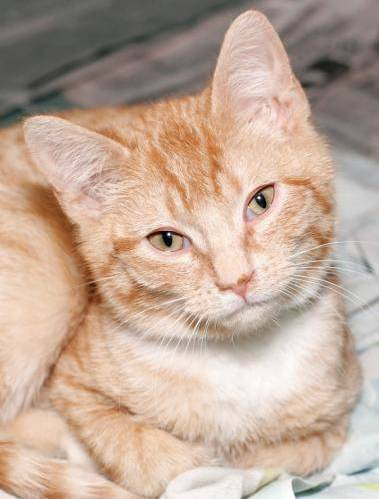

In [0]:
img_name = "monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/0.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 

Prediction
    Image name:         monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/90.jpg
    Predicted class:      dog
    Predicted score:      1.9486119747161865



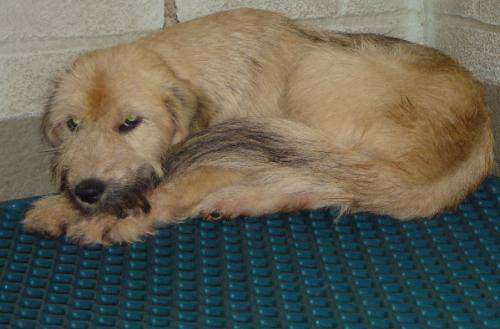

In [0]:
img_name = "monk_v1/monk/system_check_tests/datasets/dataset_cats_dogs_test/90.jpg";
predictions = gtf.Infer(img_name=img_name);

#Display 
from IPython.display import Image
Image(filename=img_name) 